In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import axvline
import cmath
import itertools
import random

%matplotlib inline


# costellazione PSK

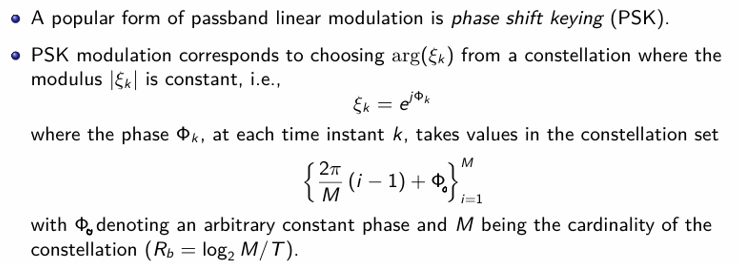

quanti bit per simbolo? 2
gli M=4 possibili simboli sono [(0, 0), (0, 1), (1, 0), (1, 1)]
il mapping simbolo-fase è: {'00': 0.7853981633974483, '01': 2.356194490192345, '11': -2.3561944901923453, '10': -0.7853981633974485}



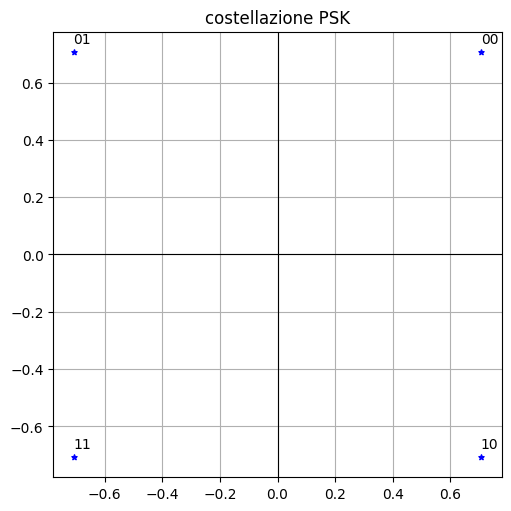

In [ ]:
# Parametri della modulazione
h = int(input("quanti bit per simbolo? ")) # numero di bit per ogni simbolo
simboli = list(itertools.product([0, 1], repeat=h)) # serve a definirci il set di possibili combinazioni = bit raggruppati nei possibili simboli
M = len(simboli) # numero di simboli possibili = lunghezza dell'alfabeto
print(f"gli M={M} possibili simboli sono {simboli}")

csi = [] # vettore dei possibili punti = rappresentazione delle possibili coppie di bit
fi0 = np.pi/4 # fase iniziale



# calcolo dell'insieme di tutte le possibili csi
for i in range(1,M+1):
  fik = ( ( (2*np.pi)/M ) * (i-1) ) + fi0
  csi.append(np.angle(np.e**(1j*fik)))



# mapping simbolo-csi: in caso di BPSK, usiamo il mapping di Grey
mapping = {}
if h == 2:
  grey_mapping = {
    "00": csi[0],
    "01": csi[1],
    "11": csi[2],
    "10": csi[3]
    }
  mapping = grey_mapping.copy()
else:
  for i in range(0,M):
    mapping["".join(str(x) for x in simboli[i])] = csi[i]
print(f"il mapping simbolo-fase è: {mapping}\n")



# Plot dei punti della costellazione
fig, ax = plt.subplots(1, 1, figsize=(5, 5),constrained_layout=True)# Since rows=1 and cols=1, ax is already a single Axes object. No need to flatten or access it using indexing.
ax.axhline(0, color='k', linewidth=0.8)
ax.axvline(0, color='k', linewidth=0.8)
ax.set_title(f'costellazione PSK')
ax.grid(True)

for i,p in enumerate(csi):
  ax.scatter( np.cos(p), np.sin(p), color='blue', s=15, marker='*', alpha=1 )
  ax.annotate(f"{list(mapping.keys())[i]}", (np.cos(p), np.sin(p)), textcoords="offset points", xytext=(6,6), ha='center')
  #print(f"\tcsi[{i}] ha cos e sin: {np.cos(p)}, {np.sin(p)}")



# segnale passabanda PSK

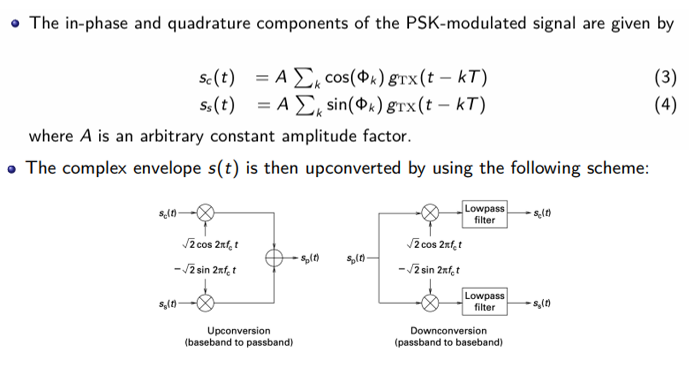

In [ ]:
def pam_modulation(binary_string, time, samples_per_bit):
    """Pulse Amplitude Modulation (PAM)."""
    modulated_signal = []

    for i, bit in enumerate(binary_string):
        if bit == 1:
            wave_piece = 1.0 * np.ones(samples_per_bit)
        else:
            wave_piece = 0.0 * np.ones(samples_per_bit)
        modulated_signal.extend(wave_piece)

    return np.array(modulated_signal)



def psk_modulation(binary_string, time, carrier_freq, samples_per_bit, amplitude = 1):
    """Phase Shift Keying modulation (PSK)."""
    modulated_signal = []

    symb = np.reshape(binary_string, (-1, h)) # raggruppo i bit del messaggio per formare i simboli

    csi_k = []
    for k in range(len(symb)):
        csi_k.append(mapping["".join(str(x) for x in symb[k])])

    for i, csi in enumerate(csi_k):
        sc = np.sqrt(2) * amplitude * np.cos(csi) * np.cos(2 * np.pi * carrier_freq * time[i * samples_per_bit:(i + 1) * samples_per_bit])
        ss = np.sqrt(2) * amplitude * np.sin(csi) * np.sin(2 * np.pi * carrier_freq * time[i * samples_per_bit:(i + 1) * samples_per_bit])

        pass_band_signal = sc - ss

        modulated_signal.extend(pass_band_signal)

    return np.array(modulated_signal)


il messaggio da inviare tramite un 4-PSK è [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0]



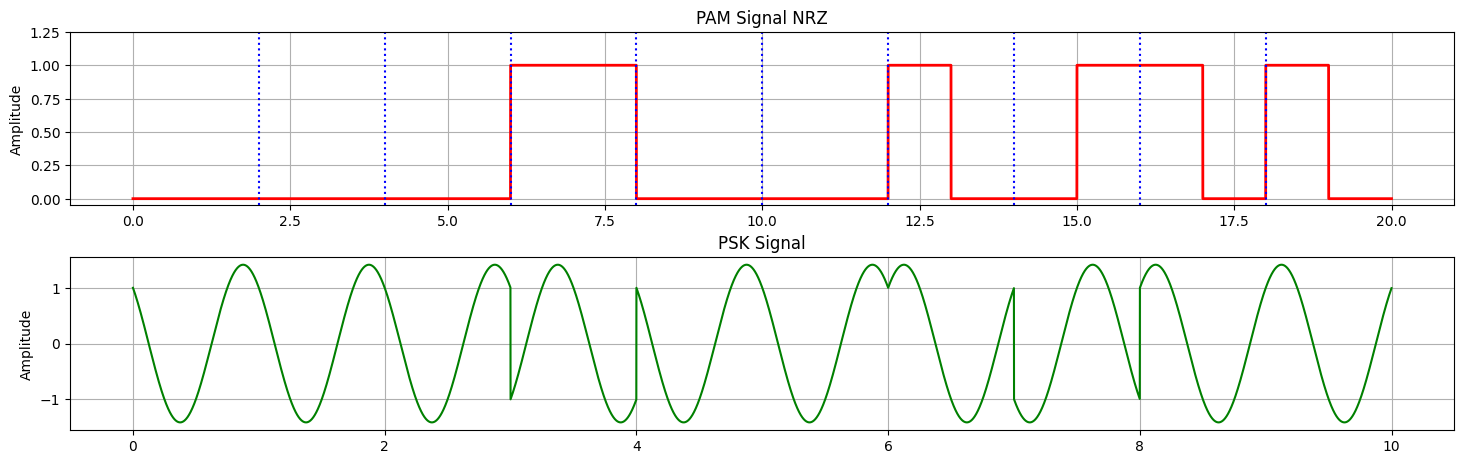

In [ ]:
# Parametri della forma d'onda
num_simboli = 10
d = num_simboli * h # lunghezza in bit del messaggio, il numero di simboli moltiplicato h, il numero di bit per simbolo
sorgente = [random.randint(0, 1) for i in range(d)] # messaggio da trasmettere composto da 5 simboli da h bit
print(f"il messaggio da inviare tramite un {M}-PSK è {sorgente}\n")

bit_duration = 1  # Duration of each bit in seconds
sample_rate = 1000  # Samples per second
carrier_freq = 1 # Frequency of the carrier wave for PSK
samples_per_bit = int(sample_rate * bit_duration)



# Time vector al bit-rate: ci serve per scandire il tempo di bit nel PAM
time = np.linspace(
    start = 0,
    stop = bit_duration * d,
    num = samples_per_bit * d,
    endpoint = False
    )

# Time vector al baud-rate: ci serve per scandire il tempo di simbolo nel PSK
s_time = np.linspace(
    start = 0,
    stop = bit_duration * num_simboli,
    num = samples_per_bit * num_simboli,
    endpoint = False
    )



# Generate modulated signals
pam_signal = pam_modulation(sorgente, time, samples_per_bit)
psk_signal = psk_modulation(sorgente, s_time, carrier_freq, samples_per_bit)



# Plot signals
plt.figure(figsize=(15,5))

plt.subplot(2, 1, 1)
plt.plot(time, pam_signal, color='red', linewidth=2)
for x_val in range(h, int(time[-1]), h):  # Add vertical lines every 3 units
    plt.axvline(x=x_val, color='blue', linestyle='dotted')
plt.ylim(top=1.25)
plt.title("PAM Signal NRZ")
plt.ylabel("Amplitude")
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(s_time, psk_signal, color='green')
plt.tight_layout(pad=2.0)
plt.title("PSK Signal")
plt.ylabel("Amplitude")
plt.grid()




link utili:


*   https://www.youtube.com/watch?v=8e4Sf6rL3zk&ab_channel=IainExplainsSignals%2CSystems%2CandDigitalComms
*   https://www.youtube.com/watch?v=El1U6ESQaX4&ab_channel=ComputerScienceLessons
*   https://www.youtube.com/watch?v=OLsbONSQFUI&ab_channel=ComputerScienceLessons
*   https://www.youtube.com/watch?v=xn9zqSoOlcE&ab_channel=ComputerScienceLessons

